In [1]:
import pandas as pd #for building dataframes from CSV files
import glob, os #for reading file names
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
my_beer_df = pd.read_csv('data/my-final-beer-data.csv')
my_new_beer_df = pd.read_csv('data/final-avg-user-beer-data.csv')

In [3]:
my_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 35 columns):
beer.auth_rating                  181 non-null float64
beer.beer_abv                     181 non-null float64
beer.beer_description             181 non-null object
beer.beer_ibu                     181 non-null int64
beer.beer_label                   181 non-null object
beer.beer_name                    181 non-null object
beer.beer_slug                    181 non-null object
beer.beer_style                   181 non-null object
beer.bid                          181 non-null int64
beer.created_at                   181 non-null object
beer.rating_count                 181 non-null int64
beer.rating_score                 181 non-null float64
beer.wish_list                    181 non-null bool
brewery.brewery_active            181 non-null int64
brewery.brewery_id                181 non-null int64
brewery.brewery_label             181 non-null object
brewery.brewery_name              1

In [4]:
my_new_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19838 entries, 0 to 19837
Data columns (total 23 columns):
beer_abv                          19838 non-null float64
beer_ibu                          19838 non-null int64
beer_name                         19838 non-null object
beer_style                        19838 non-null object
bid                               19838 non-null int64
brewery.brewery_id                19838 non-null int64
brewery.brewery_name              19838 non-null object
brewery.brewery_type              19838 non-null object
brewery.country_name              19838 non-null object
brewery.location.brewery_city     19838 non-null object
brewery.location.brewery_state    19838 non-null object
brewery.location.lat              19838 non-null float64
brewery.location.lng              19838 non-null float64
created_at                        19838 non-null object
is_homebrew                       19838 non-null int64
is_in_production                  19838 non-null int

In [5]:
new_beer_df = my_beer_df[['beer.beer_abv',
       'beer.beer_ibu', 'beer.beer_name',
       'beer.beer_style', 'beer.bid', 'beer.rating_count',
       'beer.rating_score', 'brewery.brewery_active',
       'brewery.brewery_id', 'brewery.brewery_name','brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',]]

In [6]:
untasted_beer_df = my_new_beer_df[['beer_abv',
       'beer_ibu', 'beer_name',
       'beer_style', 'bid', 'rating_count',
       'rating_score', 'is_in_production',
       'brewery.brewery_id', 'brewery.brewery_name','brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',]]

In [7]:
my_ratings = my_beer_df['beer.auth_rating']

In [8]:
new_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 13 columns):
beer.beer_abv                     181 non-null float64
beer.beer_ibu                     181 non-null int64
beer.beer_name                    181 non-null object
beer.beer_style                   181 non-null object
beer.bid                          181 non-null int64
beer.rating_count                 181 non-null int64
beer.rating_score                 181 non-null float64
brewery.brewery_active            181 non-null int64
brewery.brewery_id                181 non-null int64
brewery.brewery_name              181 non-null object
brewery.country_name              181 non-null object
brewery.location.brewery_city     181 non-null object
brewery.location.brewery_state    181 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 18.5+ KB


In [9]:
untasted_beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19838 entries, 0 to 19837
Data columns (total 13 columns):
beer_abv                          19838 non-null float64
beer_ibu                          19838 non-null int64
beer_name                         19838 non-null object
beer_style                        19838 non-null object
bid                               19838 non-null int64
rating_count                      19838 non-null int64
rating_score                      19838 non-null float64
is_in_production                  19838 non-null int64
brewery.brewery_id                19838 non-null int64
brewery.brewery_name              19838 non-null object
brewery.country_name              19838 non-null object
brewery.location.brewery_city     19838 non-null object
brewery.location.brewery_state    19838 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 2.0+ MB


In [10]:
new_beer_df["beer.beer_name"] = new_beer_df["beer.beer_name"].astype('category')
new_beer_df["beer.beer_name_cat"] = new_beer_df["beer.beer_name"].cat.codes
new_beer_df["beer.beer_style"] = new_beer_df["beer.beer_style"].astype('category')
new_beer_df["beer.beer_style_cat"] = new_beer_df["beer.beer_style"].cat.codes
new_beer_df["brewery.country_name"] = new_beer_df["brewery.country_name"].astype('category')
new_beer_df["brewery.country_name_cat"] = new_beer_df["brewery.country_name"].cat.codes
new_beer_df["brewery.location.brewery_city"] = new_beer_df["brewery.location.brewery_city"].astype('category')
new_beer_df["brewery.location.brewery_city_cat"] = new_beer_df["brewery.location.brewery_city"].cat.codes
new_beer_df["brewery.location.brewery_state "] = new_beer_df["brewery.location.brewery_state "].astype('category')
new_beer_df["brewery.location.brewery_state _cat"] = new_beer_df["brewery.location.brewery_state "].cat.codes

/Users/ErickCalzadilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ErickCalzadilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ErickCalzadilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

KeyError: 'brewery.location.brewery_state '

In [11]:
untasted_beer_df["beer_name"] = untasted_beer_df["beer_name"].astype('category')
untasted_beer_df["beer_name_cat"] = untasted_beer_df["beer_name"].cat.codes
untasted_beer_df["beer_style"] = untasted_beer_df["beer_style"].astype('category')
untasted_beer_df["beer_style_cat"] = untasted_beer_df["beer_style"].cat.codes
untasted_beer_df["brewery.country_name"] = untasted_beer_df["brewery.country_name"].astype('category')
untasted_beer_df["brewery.country_name_cat"] = untasted_beer_df["brewery.country_name"].cat.codes
untasted_beer_df["brewery.location.brewery_city"] = untasted_beer_df["brewery.location.brewery_city"].astype('category')
untasted_beer_df["brewery.location.brewery_city_cat"] = untasted_beer_df["brewery.location.brewery_city"].cat.codes
untasted_beer_df["brewery.location.brewery_state "] = untasted_beer_df["brewery.location.brewery_state "].astype('category')
untasted_beer_df["brewery.location.brewery_state _cat"] = untasted_beer_df["brewery.location.brewery_state "].cat.codes

/Users/ErickCalzadilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ErickCalzadilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ErickCalzadilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

KeyError: 'brewery.location.brewery_state '

In [12]:
new_beer_df.columns

Index(['beer.beer_abv', 'beer.beer_ibu', 'beer.beer_name', 'beer.beer_style',
       'beer.bid', 'beer.rating_count', 'beer.rating_score',
       'brewery.brewery_active', 'brewery.brewery_id', 'brewery.brewery_name',
       'brewery.country_name', 'brewery.location.brewery_city',
       'brewery.location.brewery_state', 'beer.beer_name_cat',
       'beer.beer_style_cat', 'brewery.country_name_cat',
       'brewery.location.brewery_city_cat'],
      dtype='object')

In [13]:
untasted_beer_df.columns

Index(['beer_abv', 'beer_ibu', 'beer_name', 'beer_style', 'bid',
       'rating_count', 'rating_score', 'is_in_production',
       'brewery.brewery_id', 'brewery.brewery_name', 'brewery.country_name',
       'brewery.location.brewery_city', 'brewery.location.brewery_state',
       'beer_name_cat', 'beer_style_cat', 'brewery.country_name_cat',
       'brewery.location.brewery_city_cat'],
      dtype='object')

In [14]:
final_beer_df = new_beer_df[['beer.beer_abv', 'beer.beer_ibu', 'beer.bid',
       'beer.rating_count', 'beer.rating_score', 'brewery.brewery_active',
       'brewery.brewery_id', 'beer.beer_name_cat',
       'beer.beer_style_cat', 'brewery.country_name_cat',
       'brewery.location.brewery_city_cat']]

In [15]:
final_untasted_beer_df = untasted_beer_df[['beer_abv', 'beer_ibu', 'bid',
       'rating_count', 'rating_score', 'is_in_production',
       'brewery.brewery_id', 'beer_name_cat',
       'beer_style_cat', 'brewery.country_name_cat',
       'brewery.location.brewery_city_cat']]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = my_ratings

In [18]:
X_train, X_test, y_train, y_test = train_test_split(final_beer_df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(144, 11) (144,)
(37, 11) (37,)


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/Users/ErickCalzadilla/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
print('Score: ' + str(rf.score(X_test, y_test)))

Score: 0.625884222474461


In [39]:
rf.predict(final_untasted_beer_df)

array([3.325, 3.4  , 3.4  , ..., 4.25 , 4.05 , 3.9  ])

In [40]:
predictions_df = pd.DataFrame(rf.predict(final_untasted_beer_df), columns=['predicted_values'])

In [41]:
final_predict_df = pd.concat([final_untasted_beer_df, predictions_df], axis=1)

In [42]:
final_predict_df.sort_values(by='predicted_values', ascending=False).head(10)

,beer_abv,beer_ibu,bid,rating_count,rating_score,is_in_production,brewery.brewery_id,beer_name_cat,beer_style_cat,brewery.country_name_cat,brewery.location.brewery_city_cat,predicted_values
4669,0.0,0,16351,16,4.34375,0,7484,8956,9,119,1603,4.800
3646,0.0,0,14866,255,4.34216,0,905,15987,134,119,720,4.775
2452,5.0,0,13142,21356,4.35393,1,202,13082,84,11,388,4.775
16670,5.0,0,5754,953,4.28778,0,705,5517,135,119,956,4.775
16684,5.0,0,5769,7678,4.45669,1,202,16297,85,11,388,4.775
7269,5.0,0,178,8695,4.29882,1,202,4328,87,11,388,4.775
3704,0.0,0,14949,10,4.40000,0,1792,15260,111,119,474,4.775
5644,0.0,0,17798,155,4.30806,0,536,16999,4,119,712,4.750
8559,0.0,0,21945,75,4.34000,1,2659,15342,9,119,1709,4.750
10672,0.0,0,24976,80,4.51875,0,476,6619,4,119,1517,4.750


In [43]:
my_new_beer_df[my_new_beer_df['bid']==24976]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
10672,0.0,0,Gratitude (2005),Barleywine - American,24976,476,East End Brewing Company,Brew Pub,United States,Pittsburgh,...,"Mon, 17 Jan 2011 08:47:25 +0000",0,0,80,4.51875,6,104,100,3.83124,False


In [44]:
my_new_beer_df[my_new_beer_df['bid']==5769]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
16684,5.0,0,Vigneronne,Lambic - Fruit,5769,202,Brasserie Cantillon,Micro Brewery,Belgium,Bruxelles,...,"Sat, 21 Aug 2010 09:26:35 +0000",0,1,7678,4.45669,102,10394,8845,4.42581,False


In [45]:
my_new_beer_df[my_new_beer_df['bid']==14949]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
3704,0.0,0,Tazza Mia Espresso Porter,Porter - American,14949,1792,Rock Bottom Restaurant & Brewery,Brew Pub,United States,Chattanooga,...,"Thu, 16 Dec 2010 10:41:10 +0000",0,0,10,4.4,0,33,24,3.62946,False


In [46]:
my_new_beer_df[my_new_beer_df['bid']==13142]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
2452,5.0,0,Ros? de Gambrinus,Lambic - Framboise,13142,202,Brasserie Cantillon,Micro Brewery,Belgium,Bruxelles,...,"Mon, 06 Dec 2010 13:23:21 +0000",0,1,21356,4.35393,720,31690,24128,4.344,False


In [47]:
my_new_beer_df[my_new_beer_df['bid']==16351]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
4669,0.0,0,La Mort Bourbon (2010),Belgian Strong Dark Ale,16351,7484,Black Raven Brewing Company,Micro Brewery,United States,Redmond,...,"Thu, 23 Dec 2010 11:27:25 +0000",0,0,16,4.34375,0,24,22,3.64485,False


In [51]:
my_new_beer_df[my_new_beer_df['bid']==14866]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
3646,0.0,0,Twisted Spoke 15th Anniversary,Sour - Ale,14866,905,New Belgium Brewing Company,Micro Brewery,United States,Fort Collins,...,"Wed, 15 Dec 2010 14:32:10 +0000",0,0,255,4.34216,0,373,332,3.96428,False


In [52]:
my_new_beer_df[my_new_beer_df['bid']==21945]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
8559,0.0,0,The Answer,Belgian Strong Dark Ale,21945,2659,5 Seasons Brewing,Brew Pub,United States,Sandy Springs,...,"Thu, 06 Jan 2011 10:35:07 +0000",0,1,75,4.34,4,104,86,3.78695,False


In [53]:
my_new_beer_df[my_new_beer_df['bid']==17798]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
5644,0.0,0,Wooden Hell,Barleywine - American,17798,536,Flossmoor Station Restaurant and Brewery,Micro Brewery,United States,Flossmoor,...,"Mon, 27 Dec 2010 00:30:03 +0000",0,0,155,4.30806,1,252,230,3.87173,False


In [55]:
my_new_beer_df[my_new_beer_df['bid']==178]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
7269,5.0,0,Cuv?e Saint-Gilloise (Champions),Lambic - Other,178,202,Brasserie Cantillon,Micro Brewery,Belgium,Bruxelles,...,"Sat, 21 Aug 2010 09:26:35 +0000",0,1,8695,4.29882,114,12088,10079,4.27679,False


In [56]:
my_new_beer_df[my_new_beer_df['bid']==5754]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
16670,5.0,0,Excelsior! Le Bleu,Sour - American Wild Ale,5754,705,Ithaca Beer Company,Macro Brewery,United States,Ithaca,...,"Sat, 21 Aug 2010 09:26:35 +0000",0,0,953,4.28778,5,1644,1259,4.13294,False


In [48]:
plot_df = pd.DataFrame()
plot_df['col_names'] = final_beer_df.columns
plot_df['Predictions'] = rf.feature_importances_
plot_df.sort_values(by='Predictions', ascending=False)

,col_names,Predictions
4,beer.rating_score,0.680556
0,beer.beer_abv,0.050784
7,beer.beer_name_cat,0.046338
10,brewery.location.brewery_city_cat,0.043112
8,beer.beer_style_cat,0.040398
2,beer.bid,0.033331
6,brewery.brewery_id,0.032938
3,beer.rating_count,0.029370
9,brewery.country_name_cat,0.028935
1,beer.beer_ibu,0.014237


[Text(0, 0, 'beer.rating_score'),
 Text(0, 0, 'beer.beer_abv'),
 Text(0, 0, 'beer.beer_name_cat'),
 Text(0, 0, 'brewery.location.brewery_city_cat'),
 Text(0, 0, 'beer.beer_style_cat'),
 Text(0, 0, 'beer.bid'),
 Text(0, 0, 'brewery.brewery_id'),
 Text(0, 0, 'beer.rating_count'),
 Text(0, 0, 'brewery.country_name_cat'),
 Text(0, 0, 'beer.beer_ibu'),
 Text(0, 0, 'brewery.brewery_active')]

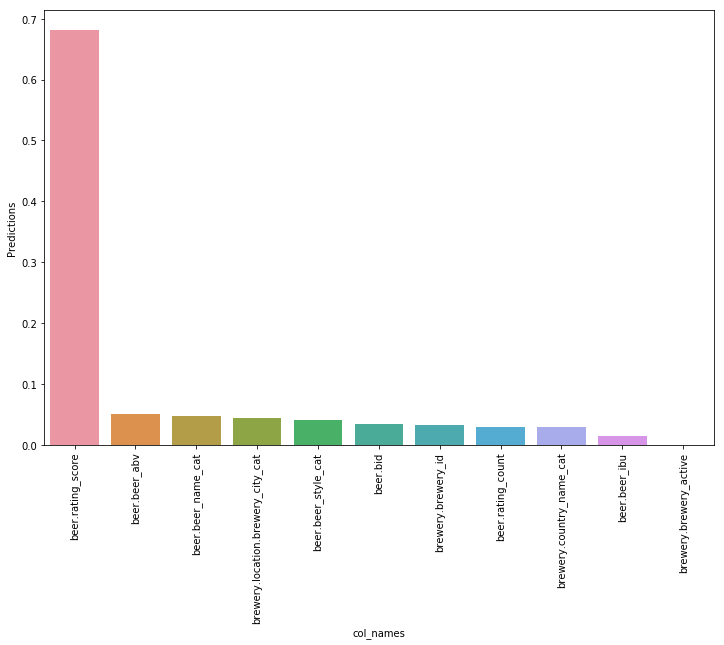

In [49]:
plt.rc("figure", figsize=(12, 8))
g = sns.barplot(x = "col_names", y = "Predictions", data = plot_df.sort_values(by='Predictions', ascending=False))
g.set_xticklabels(labels=plot_df.sort_values(by='Predictions', ascending=False)['col_names'],rotation=90)

In [50]:
final_untasted_beer_df.to_csv('beer_data_cat.csv')

In [57]:
y = final_beer_df['beer.rating_score']
final_beer_df_1 = final_beer_df.drop("beer.rating_score", axis=1)
final_untasted_beer_df_1 = final_untasted_beer_df.drop('rating_score', axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(final_beer_df_1, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(144, 10) (144,)
(37, 10) (37,)


In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/Users/ErickCalzadilla/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [95]:
print('Score: ' + str(rf.score(X_test, y_test)))

Score: 0.7958158252384948


In [96]:
rf.predict(final_untasted_beer_df_1)

array([2.961 , 3.0914, 3.4328, ..., 3.7909, 3.4048, 3.6373])

In [97]:
predictions_df = pd.DataFrame(rf.predict(final_untasted_beer_df_1), columns=['predicted_values'])

In [98]:
final_predict_df = pd.concat([final_untasted_beer_df_1, predictions_df], axis=1)

In [99]:
final_predict_df.sort_values(by='predicted_values', ascending=False).head(10)

,beer_abv,beer_ibu,bid,rating_count,is_in_production,brewery.brewery_id,beer_name_cat,beer_style_cat,brewery.country_name_cat,brewery.location.brewery_city_cat,predicted_values
17312,10.0,0,6559,15118,1,2712,70,9,119,1704,3.9321
4417,12.5,0,15910,186,1,3844,15724,5,61,9,3.9194
17626,19.9,40,6953,13852,1,1246,2327,144,119,1518,3.9184
16659,9.5,30,5741,5606,1,1,53,114,119,202,3.9163
16687,11.0,41,5772,46659,1,426,12039,154,119,1208,3.9135
18370,10.5,40,7988,14334,1,638,10981,114,98,147,3.9135
4031,12.0,47,15438,26856,1,1514,13243,124,119,994,3.9135
973,10.2,45,11179,24684,1,779,16386,154,119,1146,3.9135
14605,10.5,0,30580,19,1,3823,81,144,119,688,3.9126
6918,12.0,0,19637,34,0,536,59,109,119,712,3.9072


In [100]:
my_new_beer_df[my_new_beer_df['bid']==6559]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
17312,10.0,0,10 Commandments,Belgian Strong Dark Ale,6559,2712,The Lost Abbey,Micro Brewery,United States,San Marcos,...,"Fri, 15 Oct 2010 11:37:18 +0000",0,1,15118,3.84077,223,19255,17253,3.837,False


In [101]:
my_new_beer_df[my_new_beer_df['bid']==15910]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
4417,12.5,0,Tosta,Barleywine - English,15910,3844,Birrificio Pausa Caf?,Brew Pub,Italy,10126 Torino,...,"Tue, 21 Dec 2010 12:48:35 +0000",0,1,186,3.55645,0,249,244,3.61485,False


In [102]:
my_new_beer_df[my_new_beer_df['bid']==6953]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
17626,19.9,40,Black Tuesday,Stout - American Imperial / Double,6953,1246,The Bruery,Micro Brewery,United States,Placentia,...,"Fri, 29 Oct 2010 15:50:27 +0000",0,1,13852,4.53301,114,19201,16009,4.51394,False


In [103]:
my_new_beer_df[my_new_beer_df['bid']==5741]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
16659,9.5,30,(512) Whiskey Barrel Aged Double Pecan Porter,Porter - Imperial / Double,5741,1,(512) Brewing Company,Micro Brewery,United States,Austin,...,"Sat, 21 Aug 2010 09:26:35 +0000",0,1,5606,4.21125,44,8550,6602,4.18224,False


In [104]:
my_new_beer_df[my_new_beer_df['bid']==5772]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
16687,11.0,41,Plead The 5th Imperial Stout,Stout - Russian Imperial,5772,426,Dark Horse Brewing Co.,Micro Brewery,United States,Marshall,...,"Sat, 21 Aug 2010 09:26:35 +0000",0,1,46659,4.15149,948,72942,50881,4.14823,False


In [105]:
my_new_beer_df[my_new_beer_df['bid']==7988]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
18370,10.5,40,Ola Dubh 12 Year Special Reserve,Porter - Imperial / Double,7988,638,Harviestoun Brewery,Micro Brewery,Scotland,Alva,...,"Mon, 08 Nov 2010 06:50:13 +0000",0,1,14334,4.03766,238,17504,15896,4.02957,False


In [106]:
my_new_beer_df[my_new_beer_df['bid']==15438]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
4031,12.0,47,Rye-On-Rye,Rye Beer,15438,1514,Boulevard Brewing Co.,Micro Brewery,United States,Kansas City,...,"Sat, 18 Dec 2010 14:16:19 +0000",0,1,26856,4.01952,483,35176,30284,4.01538,False


In [107]:
my_new_beer_df[my_new_beer_df['bid']==11179]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
973,10.2,45,Wake Up Dead,Stout - Russian Imperial,11179,779,Left Hand Brewing Company,Micro Brewery,United States,Longmont,...,"Fri, 26 Nov 2010 12:09:18 +0000",0,1,24684,3.91918,207,31555,27778,3.91589,False


In [108]:
my_new_beer_df[my_new_beer_df['bid']==30580]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
14605,10.5,0,10th Anniversary Ale,Stout - American Imperial / Double,30580,3823,Blue Frog Grog & Grill,Micro Brewery,United States,Fairfield,...,"Mon, 14 Feb 2011 02:02:52 +0000",0,1,19,3.57895,0,31,30,3.64592,False


In [109]:
my_new_beer_df[my_new_beer_df['bid']==19637]

,beer_abv,beer_ibu,beer_name,beer_style,bid,brewery.brewery_id,brewery.brewery_name,brewery.brewery_type,brewery.country_name,brewery.location.brewery_city,...,created_at,is_homebrew,is_in_production,rating_count,rating_score,stats.monthly_count,stats.total_count,stats.total_user_count,weighted_rating_score,wish_list
6918,12.0,0,.357 Imperial Pilsner,Pilsner - Imperial / Double,19637,536,Flossmoor Station Restaurant and Brewery,Micro Brewery,United States,Flossmoor,...,"Fri, 31 Dec 2010 14:07:41 +0000",0,0,34,3.34559,1,55,53,3.62021,False


In [112]:
plot_df = pd.DataFrame()
plot_df['col_names'] = final_beer_df_1.columns
plot_df['Predictions'] = rf.feature_importances_
plot_df.sort_values(by='Predictions', ascending=False)

,col_names,Predictions
0,beer.beer_abv,0.464067
7,beer.beer_style_cat,0.099058
2,beer.bid,0.096190
1,beer.beer_ibu,0.089443
8,brewery.country_name_cat,0.085547
5,brewery.brewery_id,0.061430
3,beer.rating_count,0.053743
6,beer.beer_name_cat,0.025759
9,brewery.location.brewery_city_cat,0.024762
4,brewery.brewery_active,0.000000


[Text(0, 0, 'beer.beer_abv'),
 Text(0, 0, 'beer.beer_style_cat'),
 Text(0, 0, 'beer.bid'),
 Text(0, 0, 'beer.beer_ibu'),
 Text(0, 0, 'brewery.country_name_cat'),
 Text(0, 0, 'brewery.brewery_id'),
 Text(0, 0, 'beer.rating_count'),
 Text(0, 0, 'beer.beer_name_cat'),
 Text(0, 0, 'brewery.location.brewery_city_cat'),
 Text(0, 0, 'brewery.brewery_active')]

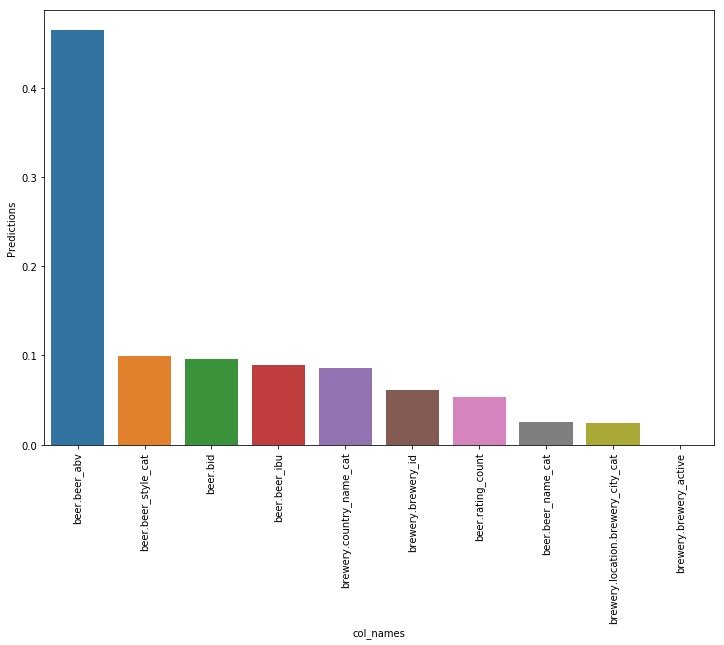

In [113]:
plt.rc("figure", figsize=(12, 8))
g = sns.barplot(x = "col_names", y = "Predictions", data = plot_df.sort_values(by='Predictions', ascending=False))
g.set_xticklabels(labels=plot_df.sort_values(by='Predictions', ascending=False)['col_names'],rotation=90)